# TESS DATA ANALYSIS

## 7/25/23

## Out of the 45 planets pulled from the TESS candidate survey from NASA exoplanet archive I was able to obtain data for 21 of them through xo_archive searches; these are shown in the final plot

In [2]:
import lightkurve as lk
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy.time import Time

%config InlineBackend.figure_format = "retina"

import sys
#sys.path.append("../CandidateSurveys")
#import fit
#import data
import xo_archive
import data

# Reading in TESS data for known & confirmed planets

In [2]:
confirmed_tess= pd.read_csv('newtess/TOI_CP.csv')
known_tess= pd.read_csv('newtess/TOI_KP.csv')
# combined data (has 45 rows)
tess_combined= pd.concat([confirmed_tess, known_tess])

In [3]:
tess_combined.columns

Index(['toi', 'toipfx', 'tid', 'ctoi_alias', 'pl_pnum', 'tfopwg_disp', 'rastr',
       'ra', 'raerr1', 'raerr2', 'decstr', 'dec', 'decerr1', 'decerr2',
       'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmrasymerr',
       'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim',
       'st_pmdecsymerr', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2',
       'pl_tranmidlim', 'pl_tranmidsymerr', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbpersymerr', 'pl_trandurh',
       'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandurhlim',
       'pl_trandurhsymerr', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2',
       'pl_trandeplim', 'pl_trandepsymerr', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radesymerr', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_insolsymerr',
       'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_eqtsymerr',
       'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmagli

# Add system column to search through exoplanet_archive

In [4]:
tess_combined.columns
new_tess= tess_combined[['toi', 'toipfx', 'pl_pnum']].copy()
system=[]
for index,row in tess_combined.iterrows():
    pfx= row['toipfx']
    sys= str(f"TOI-{pfx}")
    system.append(sys)
new_tess['system']= system
#new_tess

In [5]:
# system

# Collecting Data Columns
- TTV
- Circumbinary flag
- Binary Flag
- Eccentricity Flag

### Flags
- "sy_snum" = # of stars in system
- "cb_flag"= circumbinary (1= yes)

In [6]:
flags= []
for sys in new_tess['system']:
    test_1=xo_archive.get_exoplanet_parameters(search_name=str(f"{sys} "), columns=["pl_name", "pl_letter", "sy_snum"])
    flags.append(test_1)

### Not all of the data can be pulled from the archive so we will just look at the data that we can get

## Creating a mask to only include the systems with archive data

In [8]:
temp_frame= pd.DataFrame(flags)#.rename(columns={'0':'first'}, inplace=True)
index_list=[]
for index in np.arange(0,len(temp_frame),1):
    if temp_frame[0][index] !=None:
        index_list.append(index)

In [9]:
mask_data= temp_frame.index.isin(index_list)
#temp_frame[mask]

In [10]:
new_list= new_tess[mask_data]
new_list

,toi,toipfx,pl_pnum,system
1,1807.01,1807,1,TOI-1807
2,411.02,411,2,TOI-411
4,1444.01,1444,1,TOI-1444
6,1452.01,1452,1,TOI-1452
7,2260.01,2260,1,TOI-2260
12,237.01,237,1,TOI-237
14,2411.01,2411,2,TOI-2411
16,1695.01,1695,1,TOI-1695
17,712.04,712,4,TOI-712
18,1634.01,1634,1,TOI-1634


In [11]:
flags_reduced= []
for sys in new_list['system']:
    test_1=xo_archive.get_exoplanet_parameters(search_name=str(f"{sys} "), columns=["pl_name", "pl_letter", "sy_snum", "cb_flag", "ttv_flag","pl_orbeccen"])
    flags_reduced.append(test_1)

In [ ]:
#flags_reduced

# Determining the size of the system

In [12]:
sys_size=[]
for index in np.arange(0,len(flags_reduced),1):
    size_sys= len(flags_reduced[index])
    sys_size.append(size_sys)

In [13]:
sys_size

[1, 2, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 3, 1, 6]

## Collecting the remaining flags

In [14]:
sy_snum=[]
test_list=[]
cb_flag=[]
ttv_flag=[]
orb_ecc=[]
for value in flags_reduced:
    sy_snum_vals= str(value).split(',')[2][-1]
    sy_snum_int= int(sy_snum_vals)
    sy_snum.append(sy_snum_int)  
    cb_list= str(value).split(',')[3][-1]
    cb_int= int(cb_list)
    cb_flag.append(cb_int)
    ttv_val= str(value).split(',')[4][-1]
    ttv_int= int(ttv_val)
    ttv_flag.append(ttv_int)
    ecc_values= str(value).split(',')[5].split(':')[1].split('}')[0].split(' ')[1]
    #if ecc_values != "None":
        #new_ecc_value= int(ecc_values)
    #ecc_int= int(ecc_values)
    orb_ecc.append(ecc_values)
    test_val= str(value).split(',')[5]
    test_list.append(test_val)  

# Manually creating a mask for the eccentric systems (ecc>0.1) because the data set is small

In [15]:
ecc_df= pd.DataFrame(orb_ecc).rename(columns={0:'ecc'})
eccentric_mask= [11,14]
eccentric_ornot= ecc_df['ecc'].index.isin(eccentric_mask)

In [16]:
#flags_reduced

## Compiling all data into final DF

In [17]:
new_list['eccentric?']= eccentric_ornot
new_list['eccentricity']= orb_ecc
new_list['# stars']= sy_snum
new_list['cb_flag']= cb_flag
new_list['ttv_flag']=ttv_flag
new_list['size_sys']= sys_size
#new_list.to_csv('Full_Data_TESS_Survey.csv')
new_list

/var/folders/kx/jhwqhh7d0b9b9bkq22r91p500000gn/T/ipykernel_86064/4138765244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_list['eccentric?']= eccentric_ornot
/var/folders/kx/jhwqhh7d0b9b9bkq22r91p500000gn/T/ipykernel_86064/4138765244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_list['eccentricity']= orb_ecc
/var/folders/kx/jhwqhh7d0b9b9bkq22r91p500000gn/T/ipykernel_86064/4138765244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,toi,toipfx,pl_pnum,system,eccentric?,eccentricity,# stars,cb_flag,ttv_flag,size_sys
1,1807.01,1807,1,TOI-1807,False,None,1,0,0,1
2,411.02,411,2,TOI-411,False,None,1,0,0,2
4,1444.01,1444,1,TOI-1444,False,0.0,1,0,0,2
6,1452.01,1452,1,TOI-1452,False,0.0,2,0,0,1
7,2260.01,2260,1,TOI-2260,False,None,1,0,0,1
12,237.01,237,1,TOI-237,False,0.0,1,0,0,1
14,2411.01,2411,2,TOI-2411,False,None,1,0,0,1
16,1695.01,1695,1,TOI-1695,False,0.097,1,0,0,1
17,712.04,712,4,TOI-712,False,0.54,1,0,0,3
18,1634.01,1634,1,TOI-1634,False,0.0,2,0,0,2


# Applying Data Slices

In [18]:
len(new_list[new_list['size_sys']>1])

9

In [19]:
# Cut out all systems with TTVs
sliced= new_list[new_list['ttv_flag']==0]
# Reduces it to single star planetary systems
sliced= sliced[sliced['# stars']==1]
#There are no circumbinary systems so we don't have to slice for those...
# Reduced to non eccentric systems
sliced= sliced[sliced['eccentric?']==False]
#sliced.to_csv('TESS_Reduced_AllSystems.csv')
sliced

,toi,toipfx,pl_pnum,system,eccentric?,eccentricity,# stars,cb_flag,ttv_flag,size_sys
1,1807.01,1807,1,TOI-1807,False,None,1,0,0,1
2,411.02,411,2,TOI-411,False,None,1,0,0,2
4,1444.01,1444,1,TOI-1444,False,0.0,1,0,0,2
7,2260.01,2260,1,TOI-2260,False,None,1,0,0,1
12,237.01,237,1,TOI-237,False,0.0,1,0,0,1
14,2411.01,2411,2,TOI-2411,False,None,1,0,0,1
16,1695.01,1695,1,TOI-1695,False,0.097,1,0,0,1
17,712.04,712,4,TOI-712,False,0.54,1,0,0,3
19,784.01,784,1,TOI-784,False,0.0,1,0,0,1
21,1235.01,1235,1,TOI-1235,False,0.049,1,0,0,1


In [20]:
sliced.columns

Index(['toi', 'toipfx', 'pl_pnum', 'system', 'eccentric?', 'eccentricity',
       '# stars', 'cb_flag', 'ttv_flag', 'size_sys'],
      dtype='object')

# TESS Candidates Plot

In [8]:
#new_list= pd.read_csv('Full_Data_TESS_Survey.csv')

,Unnamed: 0,toi,toipfx,pl_pnum,system,eccentric?,eccentricity,# stars,cb_flag,ttv_flag,size_sys
0,1,1807.01,1807,1,TOI-1807,False,None,1,0,0,1
1,4,1444.01,1444,1,TOI-1444,False,0.0,1,0,0,2
2,6,1452.01,1452,1,TOI-1452,False,0.0,2,0,0,1
3,7,2260.01,2260,1,TOI-2260,False,None,1,0,0,1
4,12,237.01,237,1,TOI-237,False,0.0,1,0,0,1
5,14,2411.01,2411,2,TOI-2411,False,None,1,0,0,1
6,16,1695.01,1695,1,TOI-1695,False,0.097,1,0,0,1
7,17,712.04,712,4,TOI-712,False,0.089,1,0,0,3
8,18,1634.01,1634,1,TOI-1634,False,0.0,2,0,0,2
9,20,1075.01,1075,1,TOI-1075,False,0.0,1,0,0,1


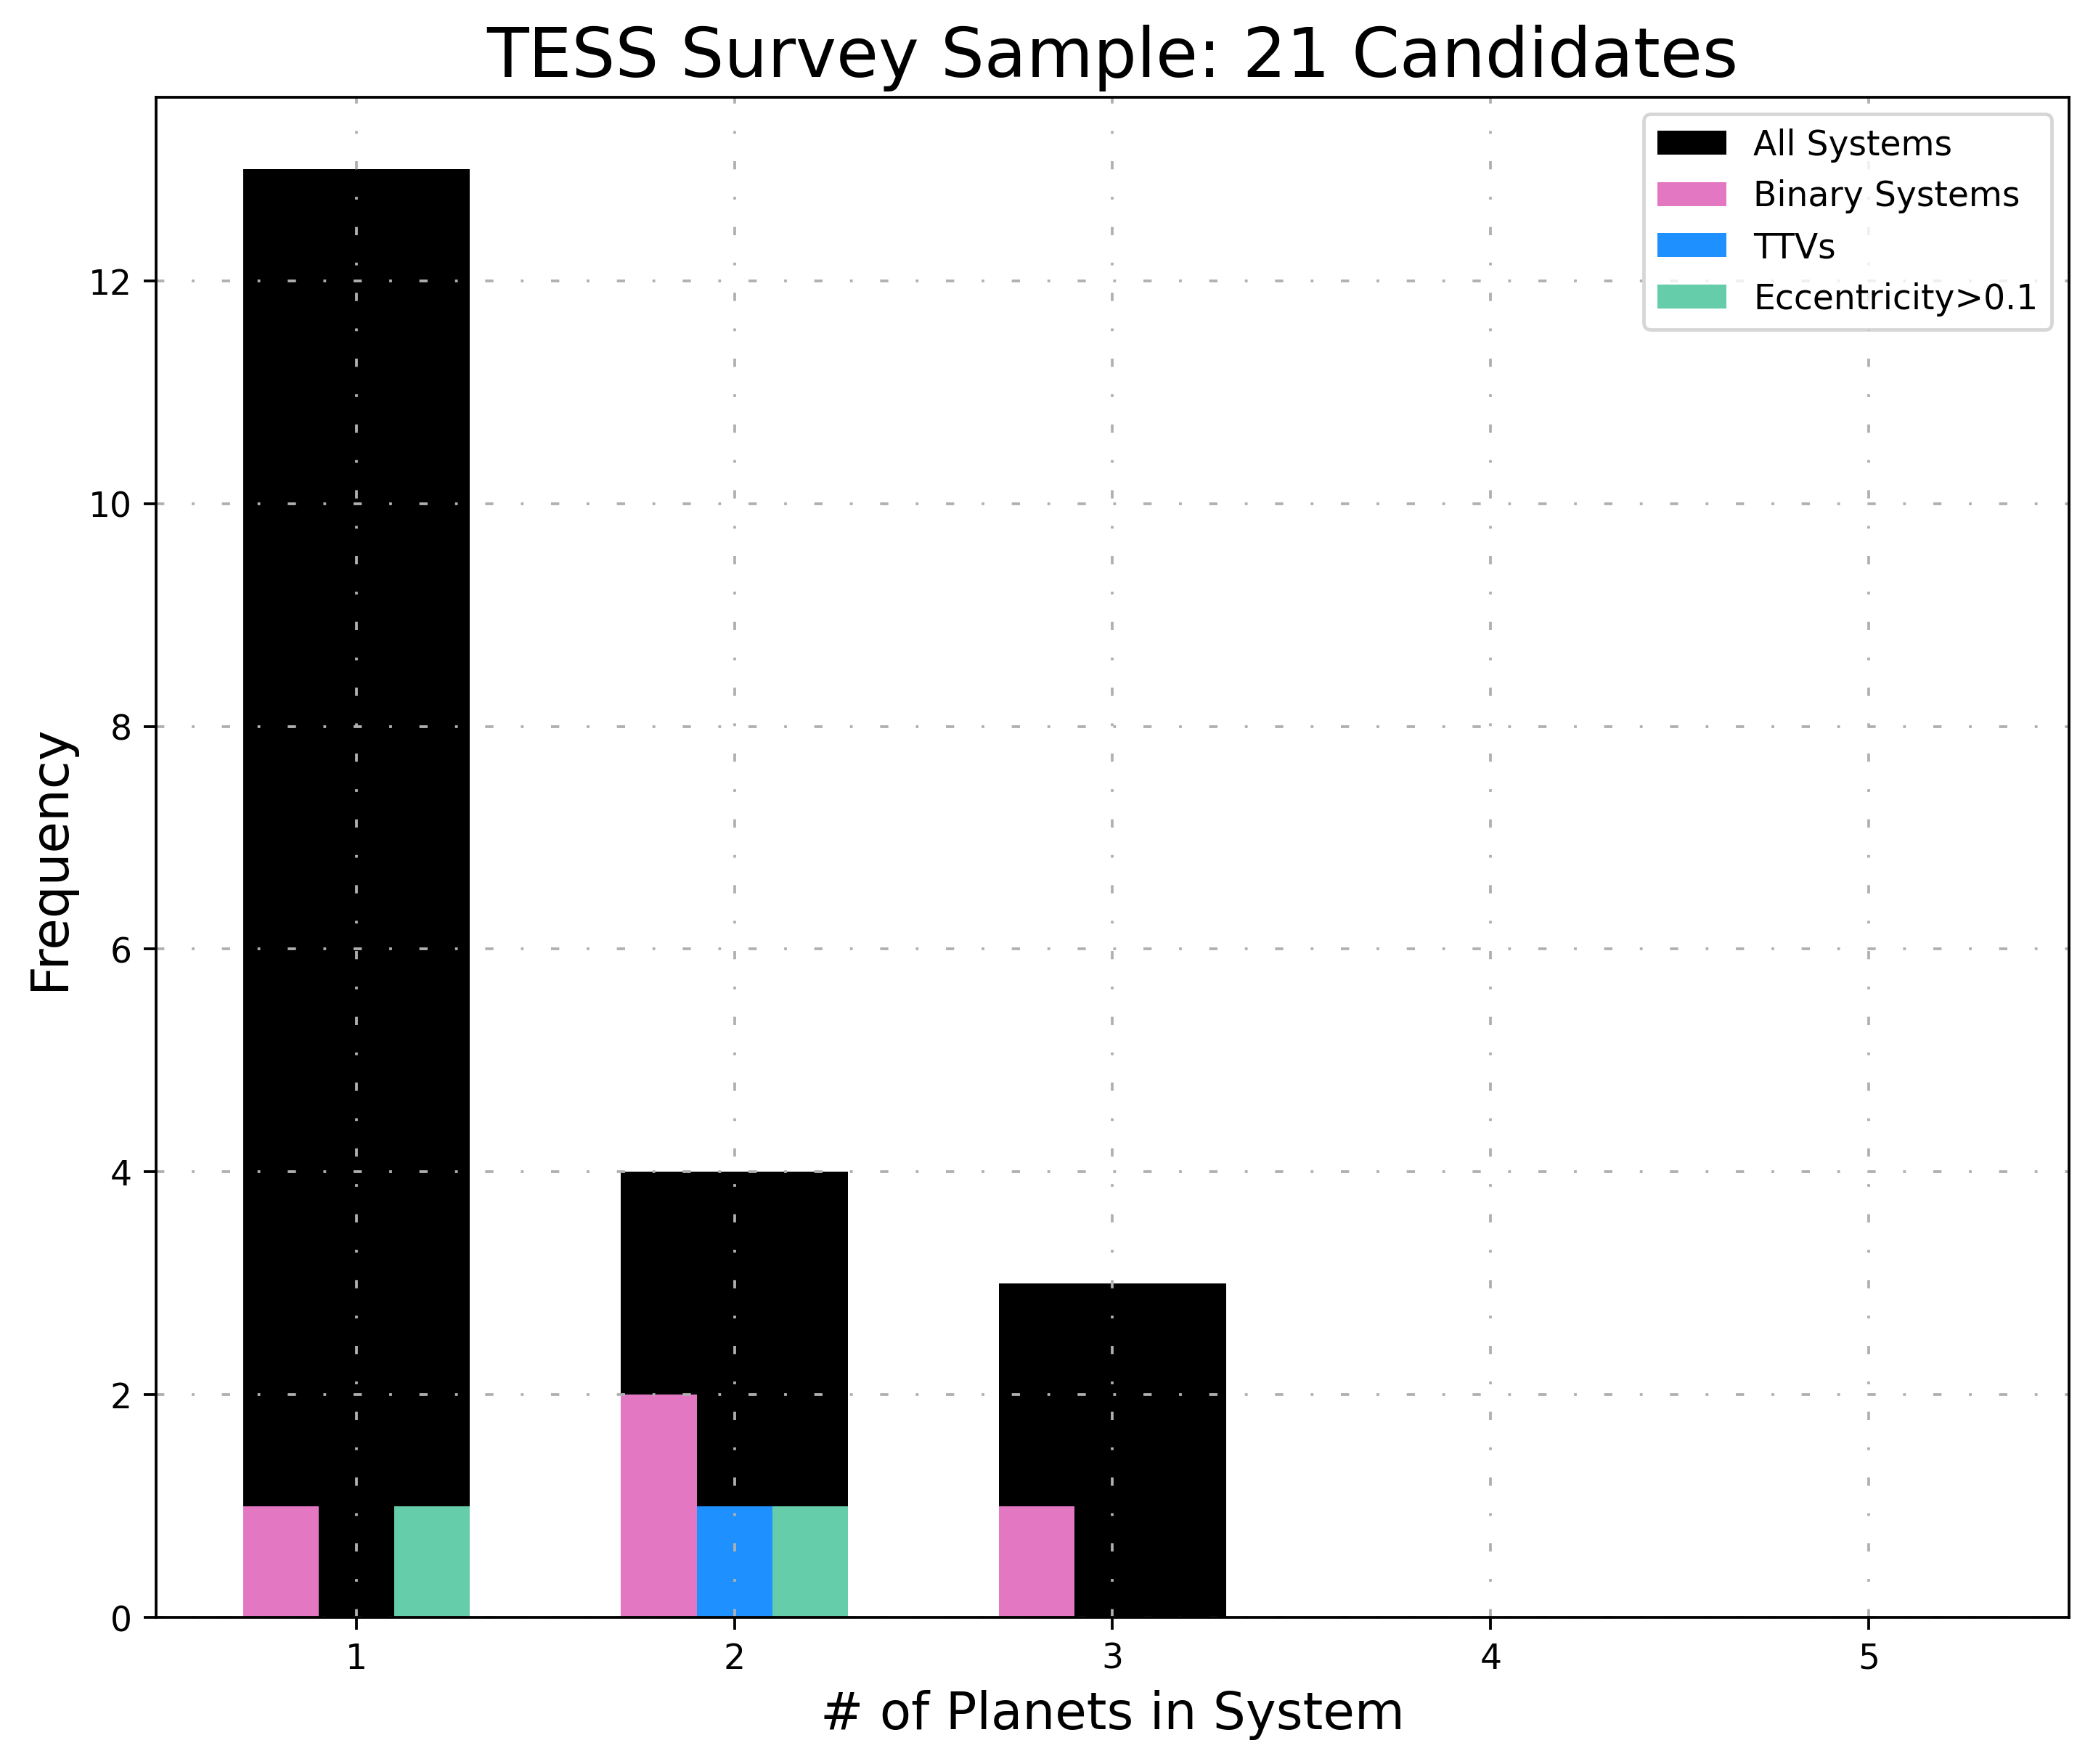

In [15]:
import matplotlib.pyplot as plt

# Data
sys_size = np.arange(1,6,1)
# full survey
all_vals=[]
#all except TTV
ttvs=[]
#exclude ecc + TTV
eccs=[]
# exclude ecc + TTV+ binary
bins=[]
for value in np.arange(1,6,1):
    all_val= len(new_list[new_list['size_sys']==value])
    all_vals.append(all_val)
    ttv_data= new_list[new_list['ttv_flag']==1]
    ttv= len(ttv_data[ttv_data['size_sys']==value])
    ttvs.append(ttv)
    ecc_data= new_list[new_list['eccentric?']==True]
    ecc= len(ecc_data[ecc_data['size_sys']==value])
    eccs.append(ecc)
    bin_data= new_list[new_list['# stars']>1]
    bin_1= len(bin_data[bin_data['size_sys']==value])
    bins.append(bin_1)
    

fig, ax = plt.subplots(figsize=(10,8), dpi=170)

# Stacked bar chart
ax.bar(sys_size, all_vals,label='All Systems', color='black', width=0.6)
ax.grid(linestyle=((0, (3, 10, 1, 10))))
ax.bar(sys_size-0.2, bins, label='Binary Systems', color='tab:pink', width=0.2)
ax.bar(sys_size, ttvs, label='TTVs', color='dodgerblue', width=0.2)
ax.bar(sys_size+0.2, eccs, label='Eccentricity>0.1', color='mediumaquamarine', width=0.2)#mediumaquamarine
#ax.bar(sys_size, no_eccs, bottom = no_eccs, label='no TTV or ecc', color='green')
ax.legend()
ax.set_title('TESS Survey Sample: 21 Candidates', size=20)
ax.set_xlabel('# of Planets in System', size=15)
ax.set_ylabel('Frequency', size=15)
plt.savefig('TESS_survey.png');